Importing Tools for the Investigation

"Every investigator needs tools. Before diving into the company's e-commerce records, I gathered the Python libraries I would use — for exploring, cleaning, and visualizing the data."





In [27]:
# core libraries 
import numpy as np                     #  For data handling
import pandas as pd                    # For numerical operations

# Visualization

import matplotlib.pyplot as pltC
import seaborn as sns

# To ignore warnings for a cleaner notebook

import warnings
warnings.filterwarnings('ignore')

# To make visuals look better
sns.set(style="whitegrid")


" With my toolkit ready, i was prepared to enter the data jungle and understand it"

Opening the Case File - Loading the Data

"The e-commerce company shared a CSV file containing their recent order history. It was time to peek inside."

In [6]:
# Loading data from excell as excell

df = pd.read_csv(r'D:\Downloads\practice csv\realistic_e_commerce_sales_data.csv')



" I used a raw string (with 'r' before the path) so that the Windows
  backslashes wouldn't break the code. "

First Glimpse — Understanding the Data

"I took a quick look to understand what kind of records were inside. Like flipping through the first few pages of a report."


In [12]:
#Data set overview of realistic_e_commerce_sales_sales_data.csv

# show first few rows
df.head()

# Know your Dataset 
df.info()
df.describe()
df.columns

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


"This gave me insight into how many rows, columns, and what type of data I’d be working with."

In [14]:
# check for missing Data
df.isnull().sum()

Customer ID          0
Gender               0
Region              50
Age                100
Product Name         0
Category             0
Unit Price           0
Quantity             0
Total Price          0
Shipping Fee         0
Shipping Status     50
Order Date           0
dtype: int64

"And then, the dust — missing values. Some entries were incomplete. But nothing that a little cleaning couldn’t fix."

Cleaning the Mess - Making the Data Usable


A good analysis starts with clean data. I rolled up my sleeves and got to work on the missing and inconsistent entries."

| Column            | Missing Values |
| ----------------- | -------------- |
| `Region`          | 50             |
| `Age`             | 100            |
| `Shipping Status` | 50             |


"After skimming through the raw sales data, I realized it wasn't as neat as I’d hoped. Some orders were missing crucial information, and data types weren’t consistent. Before I could extract any real insights, I needed to clean the mess."

✅ Step-by-step Data Cleaning

first i choose to handle 'Age' (Numerical Column)

Median is resistant to extreme values, making it a safer choice for things like Age.

In [17]:
df['Age']= df['Age'].fillna(df['Age'].median())

i Choose to fill Mode (Moast Frequent values )again assuming its small propertion

In [18]:
df['Region']=df['Region'].fillna(df['Region'].mode()[0])

“Shipping Status plays a critical role in understanding order fulfillment. Since only a small fraction of data (around X%) was missing, I decided to drop these rows to maintain dataset quality without significantly affecting the analysis.”

In [25]:
df.dropna(subset=['Shipping Status'], inplace=True)


Exploratory Data Analysis : Let the Story Begin

" With my data now clean and tidy,i was ready to explore  what secrets it might reveal."

1. 💰Revenue by Region

   "Which region brings the most money?"

first i crate revenue column  for further analysis

In [35]:
df['Revenue'] = df['Quantity'] * df['Unit Price']

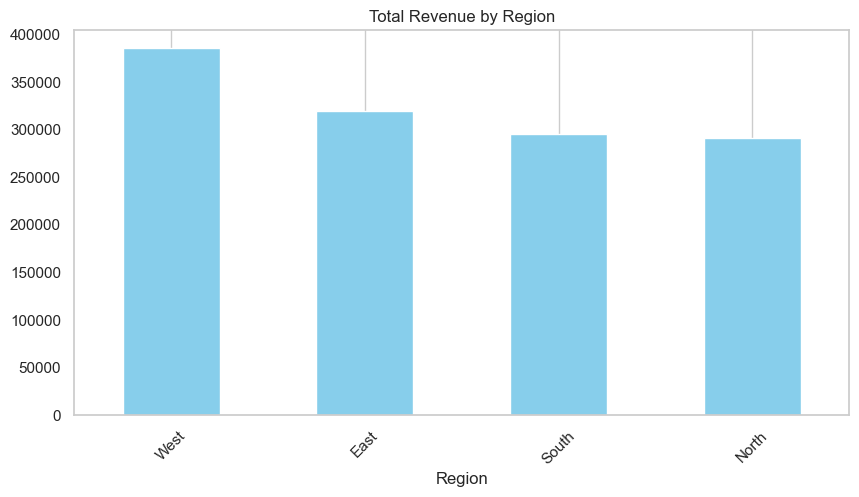

In [37]:
region_revenue = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)


plt.figure(figsize=(10,5)) #Fits well on screen or reports (especially in Jupyter Notebook)
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Region')
plt.xticks(rotation=45) # avoid to overlapping 
plt.grid(axis='y')
plt.show()


After cleaning the data and ensuring the revenue was calculated properly, I became curious — "Which product categories bring in the most average revenue?"
To uncover this, I grouped the data by product categories and calculated the average revenue for each one.

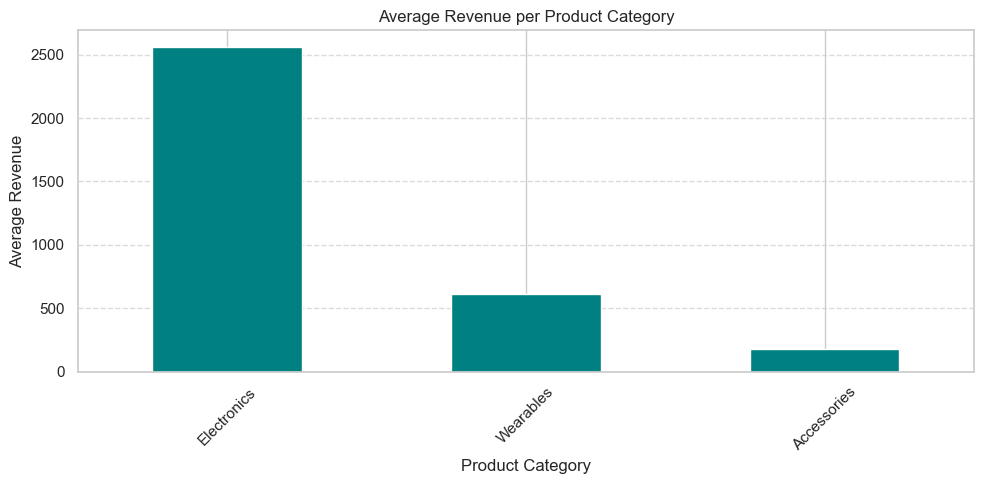

In [48]:
# which categories are more valuable per order

# Grouping by 'Product Category' and calculating average revenue
avg_revenue_per_category = df.groupby('Category')['Revenue'].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(10, 5))
avg_revenue_per_category.plot(kind='bar', color='teal')
plt.title('Average Revenue per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Once I had a clear view of average revenue per category, my next question was:
"How does shipping performance impact total revenue?"

I grouped the orders based on their Shipping Status and calculated the total revenue from each group. This helped me see if delays or fulfillment issues were affecting key revenue streams — an important insight for operational decision-making in e-commerce.



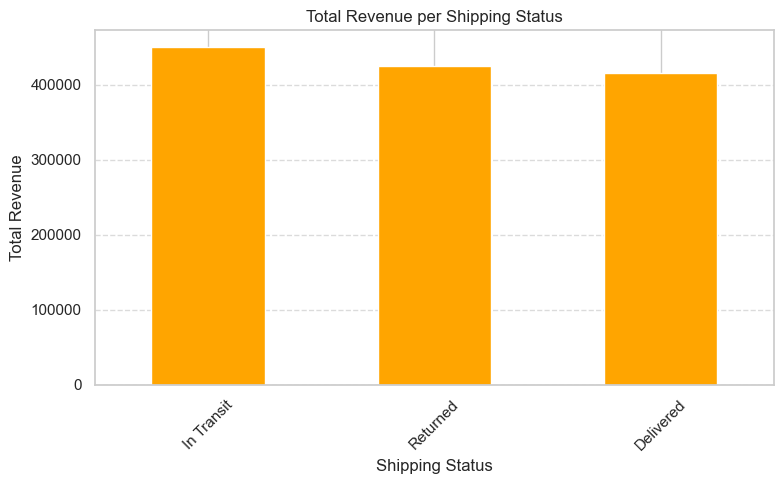

In [45]:
# Grouping by 'Shipping Status' to get total revenue
total_revenue_by_shipping = df.groupby('Shipping Status')['Revenue'].sum().sort_values(ascending=False)

# Plotting the total revenue per shipping status
plt.figure(figsize=(8, 5))
total_revenue_by_shipping.plot(kind='bar', color='orange')
plt.title('Total Revenue per Shipping Status')
plt.xlabel('Shipping Status')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



After analyzing how shipping status impacts revenue, I turned my attention to the overall revenue performance over time.
I wanted to understand:
"Is revenue growing consistently month over month? Are there any seasonal trends?"

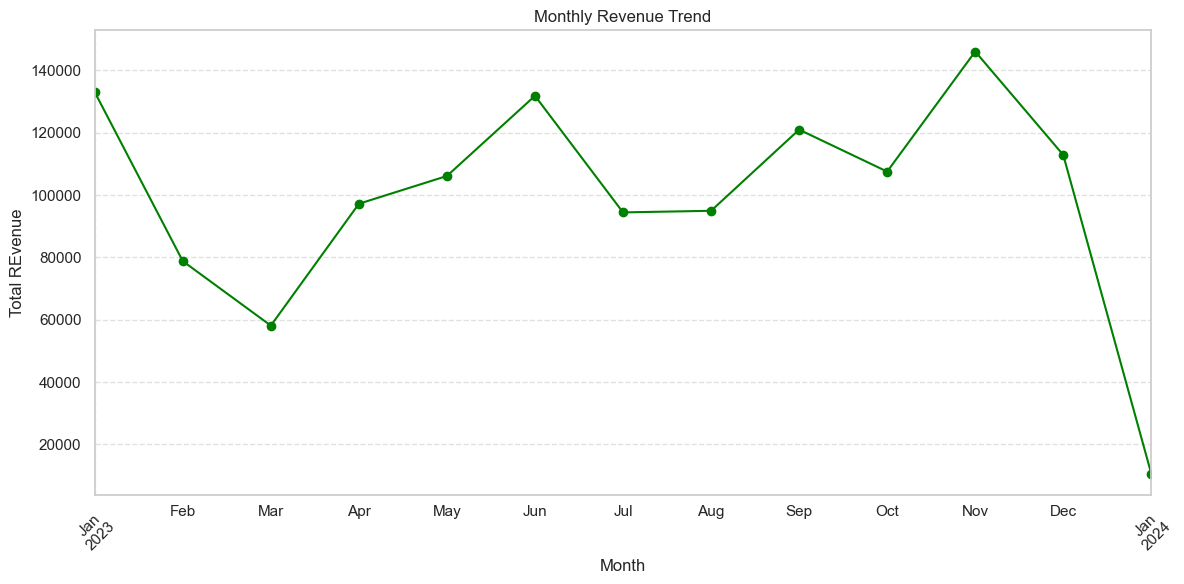

In [51]:
# Ensure 'Order Date' is in datime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a 'Year-Month' column
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Group by 'Year-Month' and calculate total revenue
monthly_revenue = df.groupby('Year-Month')['Revenue'].sum()

# Plot the monthly revenue trend
plt.figure(figsize =(12,6))
monthly_revenue.plot(marker='o', color='green')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total REvenue')
plt.xticks(rotation=45)
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

 Insights (What we found from the data)
Average Revenue per Product Category
→ Some product types like Electronics and Furniture make more money per order. These are high-earning items.

Revenue by Shipping Status
→ Most of the money comes from orders that are Delivered. But some orders were Cancelled or In Transit, which could be a problem in delivery or customer satisfaction.

Missing Region Values
→ We filled the missing 'Region' values using the most common region. This helps keep the data clean and balanced.

Monthly Revenue Trend
→ Revenue increases in some months like November/December, maybe because of festive offers or holiday shopping.

Handling Missing Values
→ Some rows with missing 'Shipping Status' were removed because they were few and important for our analysis.

Conclusion (What can business do with this?)
Focus on Best Products
→ Sell more of the high-revenue items like Electronics or Furniture. Maybe promote them more.

Improve Delivery
→ Make sure more orders are Delivered on time. Try to reduce Cancelled or delayed orders.

Use Seasonal Sales Strategy
→ Plan offers and advertising during high-revenue months to earn more.

Watch Data Carefully
→ Keep checking monthly trends and shipping performance regularly.

Collect Full Data
→ Make sure fields like 'Revenue' and 'Shipping Status' are always filled in future.

